In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train / 255
x_test = x_test / 255

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

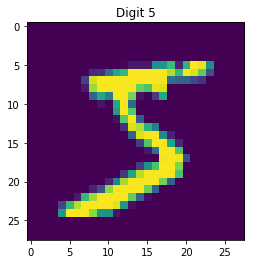

In [14]:
plt.imshow(x_train[0])
plt.title("Digit {}".format(y_train[0]))
print(x_train[0])
print(x_train.shape)

In [15]:
y_train = tf.keras.utils.to_categorical(y_train)
print(y_train.shape)
y_test = tf.keras.utils.to_categorical(y_test)
print(y_test.shape)
x_train = x_train.reshape((60000, 784, 1))
print(x_train.shape)
x_test = x_test.reshape((10000, 784, 1))
print(x_train.shape)

(60000, 10)
(10000, 10)
(60000, 784, 1)
(60000, 784, 1)


In [16]:
def relU(a):
    return np.maximum(0, a)

def relU_prime(a):
    return a > 0
def relU__prime(a):
    for i in range(len(a)):
        a[i] = a[i] > 0
    return a
# Initialise weights
w1 = np.random.rand(784, 16)
w2 = np.random.rand(16, 16)
w3 = np.random.rand(16, 10)
# Initialise biases
b1 = np.random.rand(1, 16)
b2 = np.random.rand(1, 16)
b3 = np.random.rand(1, 10)

In [17]:
def softmax(s):
    exps = np.exp(s - np.max(s, axis=1, keepdims=True))
    return exps/np.sum(exps, axis=1, keepdims=True)

def forward_prop(x, w1, w2, w3, b1, b2, b3):
    z1 = np.dot(x.T, w1) + b1
    a1 = np.zeros(z1.shape)
    for i in range(len(z1)):
        a1[i] = relU(z1[i])
    z2 = np.dot(a1, w2) + b2
    a2 = np.zeros(z2.shape)
    for i in range(len(z2)):
        a2[i] = relU(z2[i])
    z3 = np.dot(a2, w3) + b3
    a3 = np.zeros(z3.shape)
    a3 = softmax(z3)
    #for i in range(len(z3)):
        #a3[i] = softmax(z3[i])
    return a1, a2, a3

def back_prop(x, y, a1, a2, a3, w1, w2, w3, b1, b2, b3, lr):
    a3_delta = a3 - y
    z2_delta = np.dot(a3_delta, w3.T)
    a2_delta = z2_delta * relU__prime(a2)
    z1_delta = np.dot(a2_delta, w2.T)
    a1_delta = z1_delta * relU__prime(a1)
    w3 -= lr * np.dot(a2.T, a3_delta)
    b3 -= lr * np.sum(a3_delta)
    w2 -= lr * np.dot(a1.T, a2_delta)
    b2 -= lr * np.sum(a2_delta)
    w1 -= lr * np.dot(x, a1_delta)
    b1 -= lr * np.sum(a1_delta)
    return w1, w2, w3, b1, b2, b3

In [18]:
def predict(data, w1, w2, w3, b1, b2, b3):
    x = data
    a1, a2, a3 = forward_prop(x, w1, w2, w3, b1, b2, b3)
    return a3.argmax()

In [19]:
lr = 0.1

for j in range(2000):
    a1, a2, a3 = forward_prop(x_train[5], w1, w2, w3, b1, b2, b3)
    w1, w2, w3, b1, b2, b3 = back_prop(x_train[5],y_train[5], a1, a2, a3, w1, w2, w3, b1, b2, b3, lr)
    
print(predict(x_train[5], w1, w2, w3, b1, b2, b3))
print(y_train[5].argmax())

2
2


In [20]:
lr = 0.01
for i in range(1000):
    
    for j in range(2000):
        a1, a2, a3 = forward_prop(x_train[i], w1, w2, w3, b1, b2, b3)
        w1, w2, w3, b1, b2, b3 = back_prop(x_train[i], y_train[i], a1, a2, a3, w1, w2, w3, b1, b2, b3, lr)

In [21]:
#Score after training with only 1000/60000 
score = 0
for i in range(10000):
    yt = y_test[i].argmax()
    yp = predict(x_test[i], w1, w2, w3, b1, b2, b3)
    if(yp == yt):
        score = score + 1
print(score)

4783


In [22]:
lr = 0.01
for i in range(1000, 2000):
    
    for j in range(2000):
        a1, a2, a3 = forward_prop(x_train[i], w1, w2, w3, b1, b2, b3)
        w1, w2, w3, b1, b2, b3 = back_prop(x_train[i], y_train[i], a1, a2, a3, w1, w2, w3, b1, b2, b3, lr)

In [23]:
#Score after training with 2000/60000
score = 0
for i in range(10000):
    yt = y_test[i].argmax()
    yp = predict(x_test[i], w1, w2, w3, b1, b2, b3)
    if(yp == yt):
        score = score + 1
print(score)

6877


In [24]:
lr = 0.01
for i in range(2000, 6000):
    
    for j in range(2000):
        a1, a2, a3 = forward_prop(x_train[i], w1, w2, w3, b1, b2, b3)
        w1, w2, w3, b1, b2, b3 = back_prop(x_train[i], y_train[i], a1, a2, a3, w1, w2, w3, b1, b2, b3, lr)

In [25]:
#Score after training with 6000/60000 
score = 0
for i in range(10000):
    yt = y_test[i].argmax()
    yp = predict(x_test[i], w1, w2, w3, b1, b2, b3)
    if(yp == yt):
        score = score + 1
print(score)

8291


In [26]:
lr = 0.01
for i in range(6000, 10000):
    
    for j in range(2000):
        a1, a2, a3 = forward_prop(x_train[i], w1, w2, w3, b1, b2, b3)
        w1, w2, w3, b1, b2, b3 = back_prop(x_train[i], y_train[i], a1, a2, a3, w1, w2, w3, b1, b2, b3, lr)

In [27]:
#Score after training with 10000/60000
score = 0
for i in range(10000):
    yt = y_test[i].argmax()
    yp = predict(x_test[i], w1, w2, w3, b1, b2, b3)
    if(yp == yt):
        score = score + 1
print(score)

8635


In [28]:
lr = 0.01
for i in range(10000, 30000):
    
    for j in range(2000):
        a1, a2, a3 = forward_prop(x_train[i], w1, w2, w3, b1, b2, b3)
        w1, w2, w3, b1, b2, b3 = back_prop(x_train[i], y_train[i], a1, a2, a3, w1, w2, w3, b1, b2, b3, lr)

In [29]:
#Score after training with 30000/60000
score = 0
for i in range(10000):
    yt = y_test[i].argmax()
    yp = predict(x_test[i], w1, w2, w3, b1, b2, b3)
    if(yp == yt):
        score = score + 1
print(score)

8707


In [30]:
lr = 0.01
for i in range(30000, 40000):
    
    for j in range(2000):
        a1, a2, a3 = forward_prop(x_train[i], w1, w2, w3, b1, b2, b3)
        w1, w2, w3, b1, b2, b3 = back_prop(x_train[i], y_train[i], a1, a2, a3, w1, w2, w3, b1, b2, b3, lr)

In [31]:
#Score after training 40000/60000
score = 0
for i in range(10000):
    yt = y_test[i].argmax()
    yp = predict(x_test[i], w1, w2, w3, b1, b2, b3)
    if(yp == yt):
        score = score + 1
print(score)

8502


In [32]:
lr = 0.01
for i in range(40000, 50000):
    
    for j in range(2000):
        a1, a2, a3 = forward_prop(x_train[i], w1, w2, w3, b1, b2, b3)
        w1, w2, w3, b1, b2, b3 = back_prop(x_train[i], y_train[i], a1, a2, a3, w1, w2, w3, b1, b2, b3, lr)

In [33]:
#Score after training 50000/60000
score = 0
for i in range(10000):
    yt = y_test[i].argmax()
    yp = predict(x_test[i], w1, w2, w3, b1, b2, b3)
    if(yp == yt):
        score = score + 1
print(score)

8642


In [34]:
lr = 0.01
for i in range(50000, 60000):
    
    for j in range(2000):
        a1, a2, a3 = forward_prop(x_train[i], w1, w2, w3, b1, b2, b3)
        w1, w2, w3, b1, b2, b3 = back_prop(x_train[i], y_train[i], a1, a2, a3, w1, w2, w3, b1, b2, b3, lr)

In [35]:
#Score after training 60000/60000
score = 0
for i in range(10000):
    yt = y_test[i].argmax()
    yp = predict(x_test[i], w1, w2, w3, b1, b2, b3)
    if(yp == yt):
        score = score + 1
print(score)

8852
